In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

import argparse
import imutils

from skimage.data import camera
from skimage.filters import roberts, sobel, scharr, prewitt

import skimage.feature
import skimage.viewer
import sys

from data import *

%matplotlib notebook

/srv/conda/envs/notebook/lib/python3.7/site-packages/skimage/viewer/utils/__init__.py:1: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  from .core import *
Using TensorFlow backend.
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/srv/conda/envs/notebook/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of 

In [2]:
def kirsch_filter(gray):
    if gray.ndim > 2:
        raise Exception("illegal argument: input must be a single channel image (gray)")
    kernelG1 = np.array([[ 5,  5,  5],
                         [-3,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG2 = np.array([[ 5,  5, -3],
                         [ 5,  0, -3],
                         [-3, -3, -3]], dtype=np.float32)
    kernelG3 = np.array([[ 5, -3, -3],
                         [ 5,  0, -3],
                         [ 5, -3, -3]], dtype=np.float32)
    kernelG4 = np.array([[-3, -3, -3],
                         [ 5,  0, -3],
                         [ 5,  5, -3]], dtype=np.float32)
    kernelG5 = np.array([[-3, -3, -3],
                         [-3,  0, -3],
                         [ 5,  5,  5]], dtype=np.float32)
    kernelG6 = np.array([[-3, -3, -3],
                         [-3,  0,  5],
                         [-3,  5,  5]], dtype=np.float32)
    kernelG7 = np.array([[-3, -3,  5],
                         [-3,  0,  5],
                         [-3, -3,  5]], dtype=np.float32)
    kernelG8 = np.array([[-3,  5,  5],
                         [-3,  0,  5],
                         [-3, -3, -3]], dtype=np.float32)

    g1 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG1), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g2 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG2), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g3 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG3), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g4 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG4), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g5 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG5), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g6 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG6), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g7 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG7), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    g8 = cv2.normalize(cv2.filter2D(gray, cv2.CV_32F, kernelG8), None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8UC1)
    magn = cv2.max(
        g1, cv2.max(
            g2, cv2.max(
                g3, cv2.max(
                    g4, cv2.max(
                        g5, cv2.max(
                            g6, cv2.max(
                                g7, g8
                            )
                        )
                    )
                )
            )
        )
    )
    return magn

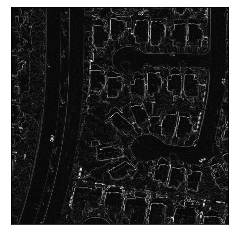

In [15]:
fg = cv2.imread("PAN_AOI_2_Vegas_img1016.png")
fg_rgb = cv2.cvtColor(fg, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(fg_rgb, cv2.COLOR_RGB2GRAY)    
bin = kirsch_filter(gray)
# show results 
plt.imshow(bin, interpolation='none', cmap='gray')
plt.xticks([]), plt.yticks([])
plt.show()

In [21]:
cnts = cv2.findContours(bin.copy(), cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts

[array([[[  0,   0]],
 
        [[  0, 649]],
 
        [[649, 649]],
 
        [[649,   0]]], dtype=int32)]

## Contour--> Centerpoint

In [32]:
# construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-i", "--image", required=True, help="path to the input image")
# args = vars(ap.parse_args())

# load the image, convert it to grayscale, blur it slightly,
# and threshold it
#image = cv2.imread("PAN_AOI_2_Vegas_img1016.png")
image = cv2.imread('0_predict.png')
print('shape={}'.format(image.shape))
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 230, 255, cv2.THRESH_BINARY)[1]

shape=(256, 256, 3)


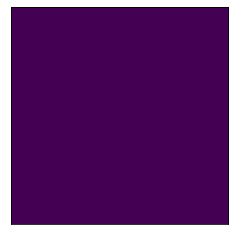

In [33]:
plt.imshow(thresh)
plt.xticks([]), plt.yticks([])
plt.show()

In [9]:
real_image = cv2.imread('/data/spacenet/bldg/AllTest/PAN-PNG/PAN_AOI_5_Khartoum_img1001.png')
real_image = cv2.resize(real_image, (256,256))


In [10]:

real_gray = cv2.cvtColor(real_image, cv2.COLOR_BGR2GRAY)

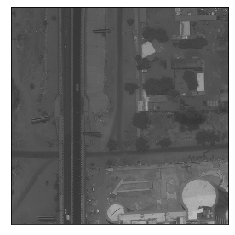

In [11]:
plt.imshow(real_image)
plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
# find contours in the thresholded image
cnts = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
#cnts

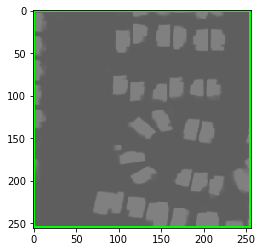

In [24]:
img_cnt = cv2.drawContours(image, cnts, -1, (0, 255, 0), 2)
plt.imshow(img_cnt)

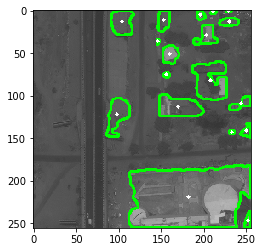

In [17]:
# loop over the contours
for c in cnts:
    # compute the center of the contour
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    # draw the contour and center of the shape on the image
    cv2.drawContours(real_image, [c], -1, (0, 255, 0), 2)
    cv2.circle(real_image, (cX, cY), 2, (255, 255, 255), -1)
    #cv2.putText(image, "center", (cX - 20, cY - 20),cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    # show the image
    plt.imshow(real_image)
    cv2.waitKey(0)
# plt.imshow(image)
# plt.xticks([]), plt.yticks([])
# plt.show()
#saveResult("data/membrane/test2",image)


## Roberts & Sobel method

In [4]:
image = "PAN_AOI_2_Vegas_img1016.png"
edge_roberts = roberts(image)
edge_sobel = sobel(image)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True,
                       figsize=(8, 4))

ax[0].imshow(edge_roberts, cmap=plt.cm.gray)
ax[0].set_title('Roberts Edge Detection')

ax[1].imshow(edge_sobel, cmap=plt.cm.gray)
ax[1].set_title('Sobel Edge Detection')

for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

ValueError: The parameter `image` must be a 2-dimensional array